#Zadania klasyfikacji - perceptron, regresja logistyczna


Proszę nie używać dostępnych w bibliotekach klasyfikatorów.


## plot_decision_regions

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

        # konfiguruje generator znaczników i mapę kolorów
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # rysuje wykres powierzchni decyzyjnej
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # rysuje wykres wszystkich próbek
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


##1. Używając perceptronów napisz klasyfikator wielo-klasowy (klasyfikujący 3 lub więcej klas). Dla każdej z klas użyj klasyfikatora binarnego. Przykład klasyfikatora binarnego znajduje się poniżej.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

class Perceptron(object):

    # Konstruktor, podajemy współczynik uczenia sie oraz ilość epok
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1+ X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update *xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

class Classification:
  def __init__(self, ppn1, ppn2):
        self.ppn1 = ppn1
        self.ppn2 = ppn2

  def predict(self,x):
    return np.where(self.ppn1.predict(x)==1,0,np.where(self.ppn2.predict(x)==1,2,1))


<ipython-input-1-c3925fdf5904>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-1-c3925fdf5904>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


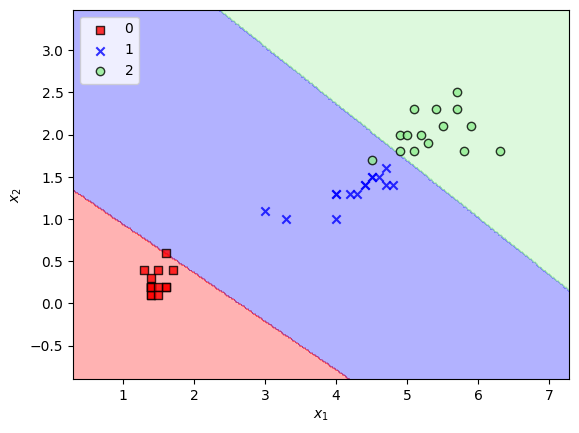

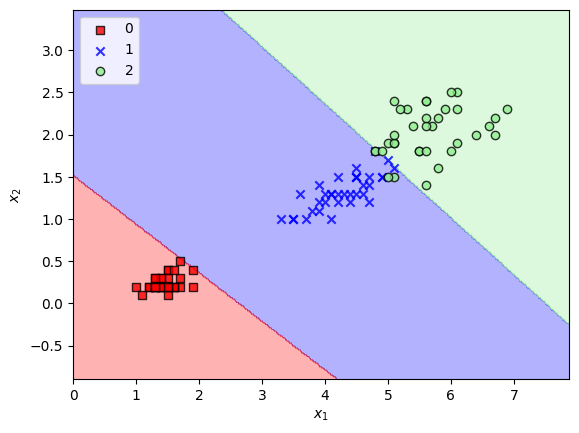

In [ ]:
def main():
    # pobiera danne do uczenia i testowania
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    # podział danych na testowe i treningowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    # selekcja danych z klas 0 , 1 i 2
    X_train_01_subset = X_train.copy()
    y_train_01_subset = y_train.copy()
    y_train_03_subset = y_train.copy()
    # w perceptronie wyjście jest albo 1 albo -1
    y_train_01_subset[(y_train == 1) | (y_train == 2)] = -1
    y_train_01_subset[(y_train_01_subset == 0)] = 1

    y_train_03_subset[(y_train == 1) | (y_train == 0)] = -1
    y_train_03_subset[(y_train_03_subset == 2)] = 1

    # uczenie modelu
    ppn = Perceptron(eta=0.1, n_iter=300)
    ppn.fit(X_train_01_subset, y_train_01_subset)

    ppn1= Perceptron(eta=0.1, n_iter=300)
    ppn1.fit(X_train_01_subset,y_train_03_subset)

    y1_predict = ppn.predict(X_train)
    y3_predict = ppn1.predict(X_train)
    classification=Classification(ppn,ppn1)

    # wyświetla wykres
    plot_decision_regions(X=X_test, y=y_test, classifier=classification)
    #plot_decision_regions(X=X_train, y=y_train, classifier=classification)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()

    plot_decision_regions(X=X_train, y=y_train, classifier=classification)
    #plot_decision_regions(X=X_train, y=y_train, classifier=classification)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()

def accuracy(y_results, y_train):
    return (1 - np.mean(y_results != y_train)) * 100

if __name__ == '__main__':
    main()

##2. Napisz klasyfikator wielo-klasowy przy użyciu regresji logistycznej. Dla każdej z klas użyj klasyfikatora binarnego. Przykład regresji logistycznej dla przypadku dwuklasowego znajduje się poniżej.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -50, 50)))

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

    def predict_proba(self, X):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      return np.round(output,3)

class Classifier:
  def __init__(self, ppn1, ppn2,ppn3):
        self.ppn1 = ppn1
        self.ppn2 = ppn2
        self.ppn3 = ppn3

  def predict(self,x):
    return np.where(self.ppn1.predict(x)==1,2,np.where(self.ppn2.predict(x)==1,0,1))

[0.0 0.259 0.999]
[0.0 0.685 1.0]
[0.0 0.573 0.279]
[0.0 0.294 0.858]
[0.995 0.18 0.0]
[1.0 0.207 0.0]
[0.0 0.328 0.999]
[1.0 0.157 0.0]
[0.998 0.136 0.0]
[0.0 0.368 0.282]
[0.0 0.132 1.0]
[0.0 0.409 0.001]
[0.0 0.81 1.0]
[0.998 0.136 0.0]
[0.0 0.575 0.0]
[1.0 0.181 0.0]
[0.0 0.685 1.0]
[0.0 0.408 0.018]
[0.999 0.266 0.0]
[0.0 0.41 0.0]
[0.0 0.368 0.067]
[0.0 0.574 0.002]
[0.0 0.332 0.002]
[1.0 0.207 0.0]
[0.0 0.37 0.0]
[0.0 0.229 0.989]
[0.0 0.201 0.985]
[0.0 0.26 0.812]
[0.999 0.266 0.0]
[0.997 0.374 0.0]


<ipython-input-1-c3925fdf5904>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-1-c3925fdf5904>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


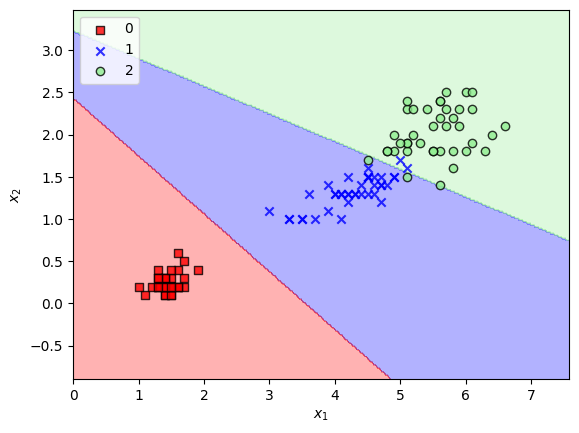

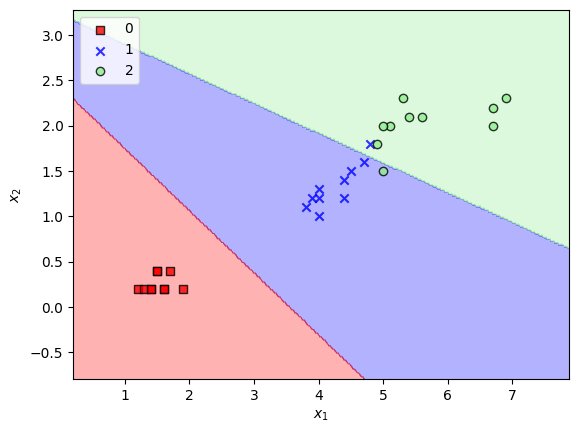

In [ ]:
def main():
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y) # Divide downloaded data into testing and training data

    y_train_01_subset = y_train.copy()
    y_train_03_subset = y_train.copy()
    X_train_01_subset = X_train.copy()
    y_train_02_subset = y_train.copy()

    y_train_01_subset[(y_train_01_subset != 0)] = -1
    y_train_01_subset[(y_train_01_subset == 0)] = 1
    y_train_01_subset[(y_train_01_subset == -1)] = 0
    #print(y_train_01_subset)

    y_train_02_subset[(y_train_02_subset != 1)] = -1
    y_train_02_subset[(y_train_02_subset == 1)] = 1
    y_train_02_subset[(y_train_02_subset == -1)] = 0

    y_train_03_subset[(y_train_03_subset != 2)] = -1
    y_train_03_subset[(y_train_03_subset == 2)] = 1
    y_train_03_subset[(y_train_03_subset == -1)] = 0


    #print(y_train_03_subset)
    lrgd1 = LogisticRegressionGD(eta=0.001, n_iter=100000, random_state=10)
    lrgd2 = LogisticRegressionGD(eta=0.001, n_iter=100000, random_state=10)
    lrgd3 = LogisticRegressionGD(eta=0.001, n_iter=100000, random_state=10)

    lrgd2.fit(X_train, y_train_01_subset)
    lrgd1.fit(X_train, y_train_03_subset)
    lrgd3.fit(X_train, y_train_02_subset)

    b=lrgd1.predict_proba(X_test)
    c=lrgd2.predict_proba(X_test)
    a=lrgd3.predict_proba(X_test)

    #print(c)
    #print('-------------------------------------------------------------------------------------------')
    #print(a)
    #print(b)
    for x in range(len(b)):
      print(f'[{c[x]} {a[x]} {b[x]}]')

    _classifier = Classifier(lrgd1, lrgd2,lrgd3)
    plot_decision_regions(X=X_train, y=y_train, classifier=_classifier)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()

    plot_decision_regions(X=X_test, y=y_test, classifier=_classifier)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()


if __name__ == '__main__':
    main()

##3. Dla regresji logistycznej napisz metodę wypisującą prawdopodobieństwo przynależności próbki (próbek) do danej klasy (klas).

In [ ]:
def main():
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y) # Divide downloaded data into testing and training data

    y_train_01_subset = y_train.copy()
    y_train_03_subset = y_train.copy()
    X_train_01_subset = X_train.copy()
    y_train_02_subset = y_train.copy()

    y_train_01_subset[(y_train_01_subset != 0)] = -1
    y_train_01_subset[(y_train_01_subset == 0)] = 1
    y_train_01_subset[(y_train_01_subset == -1)] = 0 # multi pod 0
    #print(y_train_01_subset)
    y_train_03_subset[(y_train_03_subset != 2)] = -1
    y_train_03_subset[(y_train_03_subset == 2)] = 1
    y_train_03_subset[(y_train_03_subset == -1)] = 0

    y_train_02_subset[(y_train_02_subset != 1)] = -1
    y_train_02_subset[(y_train_02_subset == 1)] = 1
    y_train_02_subset[(y_train_02_subset == -1)] = 0
    #print(y_train_03_subset)
    lrgd1 = LogisticRegressionGD(eta=0.001, n_iter=10000, random_state=10)
    lrgd2 = LogisticRegressionGD(eta=0.001, n_iter=10000, random_state=10)
    lrgd3 = LogisticRegressionGD(eta=0.001, n_iter=10000, random_state=10)

    lrgd2.fit(X_train, y_train_01_subset)
    lrgd1.fit(X_train, y_train_03_subset)
    lrgd3.fit(X_train, y_train_02_subset)

    b=lrgd1.predict_proba(X_test)
    c=lrgd2.predict_proba(X_test)
    a=lrgd3.predict_proba(X_test)
    #a=b-c
    print(c)
    #print('-------------------------------------------------------------------------------------------')
    print(a)
    print(b)

    _classifier = Classifier(lrgd1, lrgd2,lrgd3)
    plot_decision_regions(X=X_train, y=y_train, classifier=_classifier)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()

    plot_decision_regions(X=X_test, y=y_test, classifier=_classifier)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()


if __name__ == '__main__':
    main()

NameError: ignored

# Program